## Data processing

### There are three techniques to solve the missing values’ problem in order to find out the most accurate     features, and they are:

### * Dropping
### * Numerical imputation
### * Categorical imputation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats


In [4]:
# df = pd.read_csv('/home/student/220962344_ml_lab/Week3/diabetes_csv.csv')
df = pd.read_csv("D:\\MANIPAL\5th Sem\Updated\ML_Lab\ML_Theory\Week3\diabetes_csv")
df
 
## To check for missing values
# print(df.isnull())
df['Has_Missing'] = df.isnull().any(axis=1)

if df['Has_Missing'].any() == True:
    print(yes)
# This code takes the mean of the columns and retains the cols with more than 60% non-missing value
# Use axis = 1 in mean for rows 
threshold = 60
df = df.loc[df.isnull().mean(axis=1) < threshold] # rows
df = df[df.columns[df.isnull().mean() < threshold]] # cols
df

## We use imputation to prevent low training size
# Replace the missing data with a relevant value
df = df.fillna(0)
df = df.fillna(df.median())

## Outlier Identification
# * Z-Score and IQR are good for identifying outliers in univariate data.
# * Box Plots and Scatter Plots offer a visual approach to detecting outliers.
# * Machine Learning Methods: Isolation Forest and Local Outlier Factor are useful for more complex datasets.
df['Z-Score_glucose'] = stats.zscore(df['Glucose'])
df_filtered = df[abs(df['Z-Score']) <= 3]
print(df_filtered.head())

Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df['Glucose'] >= Q1) & (df['Glucose'] <= Q3)]


## Overfitting
# We can use binning to remove rows ith less importance
df['bin'] = pd.cut(df['Glucose'], bins=[100,250,400,500], labels=["Lowest", "Mid", "High"])


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 19-20: truncated \UXXXXXXXX escape (970578307.py, line 2)

In [ ]:
## We do encodeing for non numberci data
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Priority_Encoded'] = label_encoder.fit_transform(df['__name__'])


## Lab Questions

In [35]:
'''
Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
1. Load data in Pandas.
2. Drop columns that aren't useful.
3. Drop rows with missing values.
4. Create dummy variables.
5. Take care of missing data.
6. Convert the data frame to NumPy.
7. Divide the data set into training data and test data.
'''

import pandas as pd
import numpy as np

class TestTrainSplit:
    def __init__(self, target, ratio):
        self.target = target
        self.ratio = ratio

    def split(self, df):
        # Shuffle the DataFrame
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # Separate features and target
        X = df.drop(columns=[self.target])
        y = df[self.target]

        # Split the data into training and test sets
        train_set = int(self.ratio * df.shape[0])
        
        X_train = X.iloc[:train_set].to_numpy()
        y_train = y.iloc[:train_set].to_numpy()

        X_test = X.iloc[train_set:].to_numpy()
        y_test = y.iloc[train_set:].to_numpy()
        
        return X_train, X_test, y_train, y_test
    
    def preprocess(self,df):
            df = df.dropna() # drops all the Nan values

            # dummy variables for categorical columns
            df_dummies = pd.get_dummies(df, drop_first=True, columns = ['sex'])

            # shuffle the DataFrame by using sample to extract some data
            df_dummies = df_dummies.sample(random_state=42).reset_index(drop=True)

            return df

df  = pd.read_csv('hepatitis_csv.csv')
        
splitter = TestTrainSplit(target='class', ratio = 0.8)

splitter.preprocess(df)

X_train, X_test, y_train, y_test = splitter.split(df)

print(X_train)
print(X_test)
print(y_train)
print(y_test)


[[36 'female' True ... 4.2 100.0 False]
 [51 'female' True ... 3.0 63.0 True]
 [62 'female' False ... nan nan False]
 ...
 [48 'female' False ... 2.7 31.0 True]
 [78 'female' True ... 4.0 nan False]
 [56 'female' False ... 4.0 nan True]]
[[36 'female' False False False False False False True True False False
  False 0.7 164.0 44.0 3.1 41.0 False]
 [69 'male' True False True False False True False False False False
  False 3.2 119.0 136.0 nan nan True]
 [30 'female' True False True False False True False False False False
  False 0.7 50.0 78.0 4.2 74.0 False]
 [45 'female' False False True True True True False False False False
  False 2.3 nan 648.0 nan nan True]
 [39 'female' False False False False False True False False False False
  False 0.9 85.0 60.0 4.0 nan False]
 [61 'female' False False True True False False True False True False
  False 0.8 75.0 20.0 4.1 nan True]
 [64 'female' True True True True False False True False False False
  False 1.0 80.0 38.0 4.3 74.0 False]
 [36 '

In [39]:
'''
2. a. Construct a CSV file with the following attributes:
Study time in hours of ML lab course (x)
Score out of 10 (y)
The dataset should contain 10 rows.
b. Create a regression model and display the following:
Coefficients: B0 (intercept) and B1 (slope)
RMSE (Root Mean Square Error)
Predicted responses
c. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.
d. Implement the model using two methods:
Pedhazur formula (intuitive)
Calculus method (partial derivatives, refer to class notes)
e. Compare the coefficients obtained using both methods and compare them with the analytical solution.
f. Test your model to predict the score obtained when the study time of a student is 10 hours.
Note: Do not use scikit-learn.
'''

import numpy as np
import pandas as pd

class LinearRegression:
    def __init__(self):
        self.weight = None
        self.bias = None
        self.epochs = []
        self.loss = []
        
    def fit(self, X, y, epochs=1000, alpha=0.01):
        num_samples = len(X)
        self.weight = 0.0
        self.bias = 0.0

        # Gradient descent
        for epoch in range(epochs):
            y_pred = self.predict(X) # get the predicted y value
            weight_gradient = -2 * np.sum((y - y_pred) * X) / num_samples
            bias_gradient = -2 * np.sum(y - y_pred) / num_samples
            # increase the step size
            self.weight -= alpha * weight_gradient
            self.bias -= alpha * bias_gradient
            
            # print the loss
            if epoch % 100 == 0:
                loss = np.mean((y_pred - y) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")
                self.epochs.append(epoch)
                self.loss.append(loss)

    def pedhazur(self, df):
        # Calculate the means
        X = df['x']
        y = df['y']
        X_mean = np.mean(X)
        y_mean = np.mean(y)

        # Calculate covariance and variance
        cov_xy = np.mean(X * y) - X_mean * y_mean
        var_x = np.mean(X**2) - X_mean**2

        # Calculate B1 and B0
        b1_pedhazur = cov_xy / var_x
        b0_pedhazur = y_mean - b1_pedhazur * X_mean

        print(f"Pedhazur B0: {b0_pedhazur}")
        print(f"Pedhazur B1: {b1_pedhazur}")

    def calculus(self,df):
        X = df[['x']].values.flatten()
        y = df['y'].values

        # Add intercept term
        X_b = np.c_[np.ones_like(X), X]

        # Calculate coefficients
        coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

        b0_calculus, b1_calculus = coefficients

        print(f"Calculus B0: {b0_calculus}")
        print(f"Calculus B1: {b1_calculus}")

    def predict(self, X):
        
        if self.weight is None or self.bias is None:
            raise ValueError("Model has not been trained yet.")
        return self.weight * X + self.bias

    def mean_squared_error(self, y_true, y_pred):
        
        return np.mean((y_true - y_pred) ** 2)
    
# Generate data
np.random.seed(42)
X = np.random.rand(100)  
y = np.random.rand(100)

# Create DataFrame
dictionary = {
    'x': X,
    'y': y
}

df = pd.DataFrame(dictionary)
splitter = TestTrainSplit(target='y', ratio = 0.8)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = splitter.split(df)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train, epochs=1000, alpha=0.01)

# Predict and evaluate
y_pred = model.predict(X_test)

mse = model.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Learned weight: {model.weight}")
print(f"Learned bias: {model.bias}")

model.calculus(df)
model.pedhazur(df)



Epoch 0, Loss: 0.32164117596688224
Epoch 100, Loss: 0.08610027895645295
Epoch 200, Loss: 0.08557773589673466
Epoch 300, Loss: 0.08557655951318477
Epoch 400, Loss: 0.08557655686483219
Epoch 500, Loss: 0.08557655685887004
Epoch 600, Loss: 0.08557655685885664
Epoch 700, Loss: 0.0855765568588566
Epoch 800, Loss: 0.0855765568588566
Epoch 900, Loss: 0.0855765568588566
Mean Squared Error: 0.08368512837536748
Learned weight: -1.1160810721097005e-14
Learned bias: 0.4858648156720179
Calculus B0: 0.5135976564010362
Calculus B1: -0.03353164387962033
Pedhazur B0: 0.5135976564010365
Pedhazur B1: -0.03353164387962079


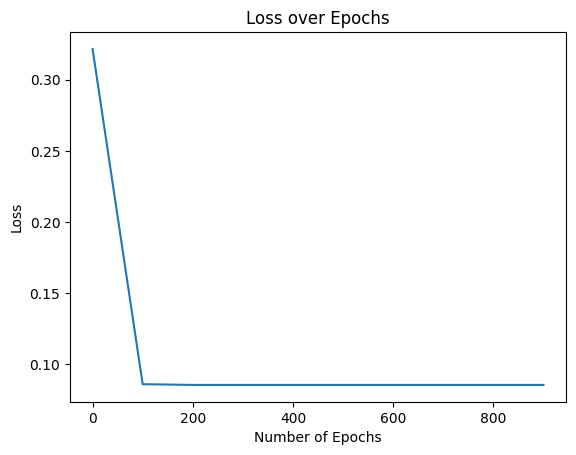

In [40]:
import matplotlib.pyplot as plt  

plt.plot(model.epochs, model.loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()